<h1><center> DS 300: Lab 4 - Clustering

![image](https://images0.cnblogs.com/blog/573996/201311/15181644-666c09ebfe1a4a4eac839430ae1628ce.png)

## Introduction
Clustering is one of the most important techniques in unsupervised learning, and it is often used in the analysis of genomic data. In this lab, we'll leverage divisive and hierarchical clustering on the `NCI60` cancer cell line microarray data, which consists of 6,830 gene expression measurements on 64 cancer cell lines.

#### Import necessary libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Question 1:

#### Load the `lab4_X.csv` [(link)](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab4_X.csv) as the X matrix data, and `lab4_y.csv` [(link)](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab4_y.csv) as the y vector data. Use the first column from each dataset as the index of the DataFrame. 

#### Note that each cell line (row of X) is labeled with a cancer type (y). But we'll ignore the cancer types in performing clustering, as these are unsupervised techniques. After performing clustering, we'll use this column to see the extent to which these cancer types agree with the results of these unsupervised techniques.

In [130]:
# Load the NCI60 data into X and y
X = 'https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab4_X.csv'
X = pd.read_csv(X, index_col=0)


y = 'https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab4_y.csv'
y = pd.read_csv(y, index_col=0)



The data has 64 rows and 6,830 columns.

In [131]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [132]:
y.head()

,x
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST


## Question 2:

#### Let's take a look at the cancer types for the cell lines:

In [133]:
y['x'].value_counts()



RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
MCF7D-repro    1
K562A-repro    1
UNKNOWN        1
MCF7A-repro    1
K562B-repro    1
Name: x, dtype: int64

#### Check the total missing values

In [134]:
y['x'].isnull().sum()


0

#### Normalize the feature vector by using `StandardScalar`

In [135]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)


X_norm

array([[ 0.72867057,  1.60722049,  1.32568834, ...,  0.52089301,
        -0.83636534, -1.38467476],
       [ 1.59641782,  1.7535441 ,  0.44168566, ..., -0.8236521 ,
        -0.92542475, -1.43144619],
       [ 2.19028963, -0.01621694, -0.34909222, ...,  0.00870438,
        -0.96095134, -0.09583766],
       ...,
       [ 0.52313039, -0.78801506, -0.30257053, ...,  0.36723642,
         3.38176079,  2.53525983],
       [-0.07065235,  0.22330662, -0.16300549, ..., -0.46507011,
        -0.21343532, -1.2444386 ],
       [ 0.84285956, -0.32227482,  0.09286376, ...,  0.53369773,
        -0.49820333,  0.71218974]])

#### Covert ndarray X_norm back to DataFrame.

In [136]:
X = pd.DataFrame(X_norm)


X.head()

,0,1,2,3,4,5,6,7,8,9,...,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
0,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,...,-1.030663,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675
1,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,...,-0.215657,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446
2,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,...,0.452274,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838
3,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,...,-1.313667,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408
4,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,...,0.718297,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992


## Question 3: Hierarchical Clustering

#### We now proceed to hierarchically cluster the cell lines, with the goal of finding out whether or not the observations cluster into distinct types of cancer.

#### We now perform hierarchical clustering of the observations using complete, single, and average linkage. We'll use standard Euclidean distance as the similarity measure:

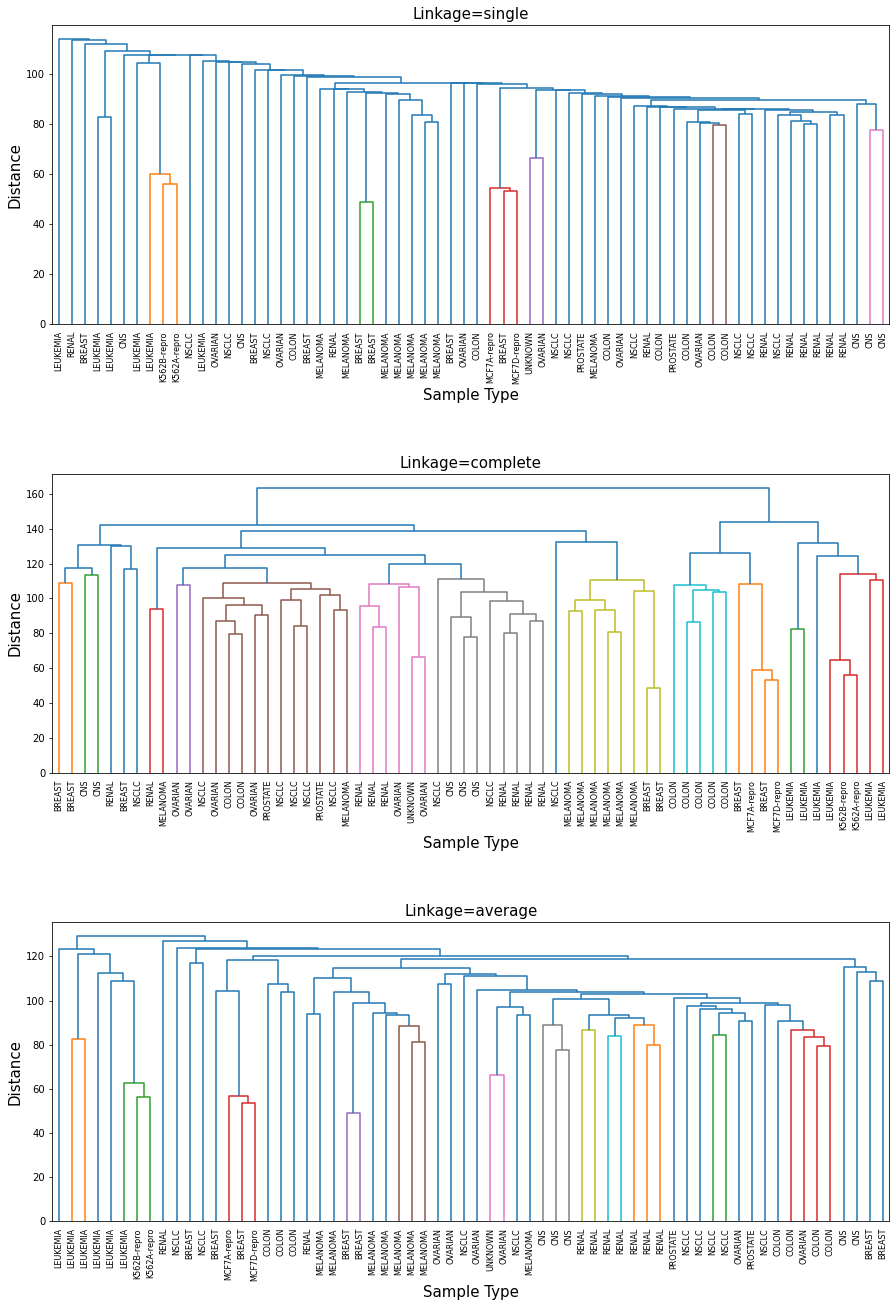

In [137]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# This step ensures the x axis labels of the dendrogram will contain the
# true labels so that we can visualize the "goodness" of the clustering
X.index = y['x']

# Setup the subplot canvas (3 rows 1 column)
fig, ax = plt.subplots(3,1, figsize=(15,22))
fig.subplots_adjust(hspace=0.5)

# Train hierarchical clustering with 3 linkage variations
# Draw the dendrogram for each setting
linkages = ['single', 'complete', 'average']
for link, axis in zip(linkages, fig.axes):
    # Subfigures' title and labels
    axis.set_title("Linkage=%s" % link, size=15)
    axis.set_xlabel('Sample Type', size=15)
    axis.set_ylabel('Distance', size=15)
    
    # HC models
    hc = linkage(X, link)
    
    
    # Plot dendrograms
    dendrogram(hc, leaf_rotation=90, leaf_font_size=8, ax=axis, labels = X.index)




#### Observations: 
We see that the choice of linkage certainly does affect the results obtained. 
Typically, single linkage will tend to yield trailing clusters: very large clusters onto which individual observations attach one-by-one. 

On the other hand, complete and average linkage
tend to yield more balanced, attractive clusters, but assuming for globular shapes.
For this reason, complete
and average linkage are generally preferred to single linkage. Clearly cell
lines within a single cancer type do tend to cluster together, although the
clustering is not perfect. 

## Question 4:

#### Let's use our complete linkage hierarchical clustering for the analysis. We can cut the dendrogram at the height that will yield a particular number of clusters, say 4.

In [138]:
hc_complete = linkage(X, 'complete')


hc_complete_4_clusters = cut_tree(hc_complete, n_clusters=4)


pd.crosstab(index = X.index, 
            columns = np.transpose(hc_complete_4_clusters)[0],  # Use transpose here
            rownames = ['Cancer Type'], 
            colnames = ['Cluster'])

Cluster,0,1,2,3
Cancer Type,,,,
BREAST,2,3,0,2
CNS,3,2,0,0
COLON,2,0,0,5
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


There are some clear patterns. All the leukemia cell lines fall in cluster 2,
while the breast cancer cell lines are spread out over three different clusters.
We can plot the cut on the dendrogram that produces these four clusters by adding an `axhline()`, which draws a horizontal line on top of our plot:

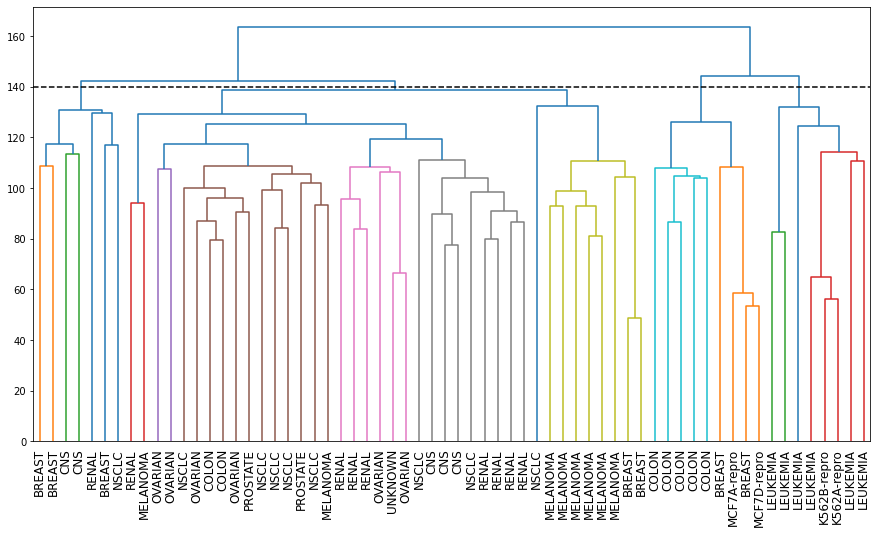

In [139]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
dendrogram(hc_complete, leaf_rotation=90, leaf_font_size=12, labels=X.index)  

plt.axhline(y=140, 
            linestyle="--",
           color="black")


plt.show()


## Question 5:

#### K-means clustering and hierarchical clustering with the dendrogram cut to obtain the same number of clusters can yield **very** different results. How do these `NCI60` hierarchical clustering results compare to what we get if we perform K-means clustering with `K = 4`? Use `n_init` as 150, and random seed as 101.

In [140]:
from sklearn.cluster import KMeans

kmeans_4 = KMeans(n_clusters=4, random_state=101, n_init=150)


kmeans_4.fit(X)


kmeans_4.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

We can use a confusion matrix to compare the differences in how the two methods assigned observations to clusters:

In [141]:
pd.crosstab(index = kmeans_4.labels_, 
            columns = np.transpose(hc_complete_4_clusters)[0],   # Use transpose here
            rownames = ['K-Means'],  
            colnames = ['Hierarchical'])

Hierarchical,0,1,2,3
K-Means,,,,
0,16,7,0,0
1,0,0,8,0
2,9,0,0,0
3,15,0,0,9


We see that the four clusters obtained using hierarchical clustering and Kmeans
clustering are somewhat different which is expected.

## Question 6: Evaluation

#### We will use both external and internal measures for the "goodness" of the clusterings.

Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, Normalized Mutual Information (NMI) and Adjusted Mutual Information (AMI). NMI is often used in the literature, while AMI was proposed more recently and is normalized against chance. Perfect labeling is scored 1.0, Bad (e.g. independent labelings) have non-positive scores.



#### External Measure

In [142]:
from sklearn import metrics

#### You don't actually need to LabelEncode the true labels. The function will do it for you. Check the following results.

In [143]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
new_label = LE.fit_transform(y['x'])
print("AMI of KMeans: ", metrics.adjusted_mutual_info_score(new_label, kmeans_4.labels_)  )

AMI of KMeans:  0.4225185670895189


`homogeneity`: each cluster contains only members of a single class.
`completeness`: all members of a given class are assigned to the same cluster.
Their harmonic mean called V-measure is computed by `v_measure_score`

In [144]:
print('Homogenity: ', metrics.homogeneity_score(y['x'], kmeans_4.labels_))
print('Completeness: ', metrics.completeness_score(y['x'], kmeans_4.labels_))
print('V Measure: ', metrics.v_measure_score(y['x'], kmeans_4.labels_))


Homogenity:  0.40349950491507935
Completeness:  0.7527929420225796
V Measure:  0.5253888498781374


#### Internal Measure

In [157]:
print("Silhouette score: ", metrics.silhouette_score(X, kmeans_4.labels_, metric='euclidean'))



Silhouette score:  0.07933826710011246


## Question 7: Feature reduction with Agglomerative Feature Clustering

#### Another useful application of agglomerative clustering is to reduce the feature dimensionality. `FeatureAgglomerative` [[link]](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html) provided by Sklearn is similar to AgglomerativeClustering, but recursively merges features instead of samples. Use `n_clusters` as 20.

In [146]:
from sklearn.cluster import FeatureAgglomeration

agglo = FeatureAgglomeration(n_clusters=20)

agglo.fit(X)

X_reduced = agglo.transform(X)


In [147]:
X_reduced.shape

(64, 20)

#### Use the reduced feature to train a AgglomerativeClustering model again and evaluate the Silhouette Score.

In [148]:
kmeans_4_reduced = KMeans(n_clusters=4, random_state=101, n_init=150)

kmeans_4_reduced.fit(X_reduced)

kmeans_4_reduced.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [149]:
print("Silhouette score: ", metrics.silhouette_score(X_reduced, kmeans_4_reduced.labels_, metric='euclidean'))




Silhouette score:  0.2731503832473517


#### Comparing with kmeans_4, the score has almost been tripled.

## Question 8: DBSCAN

#### Let's start by finding an optimal epsilon parameter with K nearest neighbours

In [150]:
from sklearn.neighbors import NearestNeighbors

In [151]:
# Use 5 nearest neighbors

nn = NearestNeighbors(n_neighbors=5)

nn.fit(X)

distances, indices = nn.kneighbors(X)



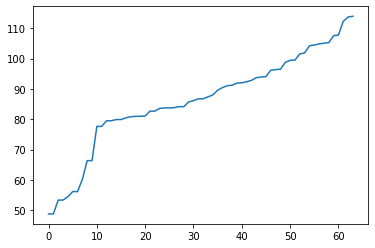

In [152]:
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]

plt.plot(distances) 

## Question 9

#### The first abruptive change on the curve happens when the distance is around 1.4. Let's use epsilon as 1.4.

In [153]:
from sklearn.cluster import DBSCAN

db = DBSCAN(algorithm='auto', eps=1.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

db.fit(X_reduced)



DBSCAN(eps=1.4)

In [154]:
clusters = db.labels_


clusters

array([ 0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1,
       -1,  0,  0, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

## Question 10

#### Evaluate DBSCAN model with Silhouette score, homogeneity score, completeness score and V measure.

In [155]:
labels = db.labels_
print('Solhouette score: ', metrics.silhouette_score(X_reduced, db.labels_, metric='euclidean'))


Solhouette score:  0.22979539616581995


In [156]:
print('Homogenity: ', metrics.homogeneity_score(y['x'], db.labels_))
print('Completeness: ', metrics.completeness_score(y['x'], db.labels_))
print('V Measure: ', metrics.v_measure_score(y['x'], db.labels_))



Homogenity:  0.23555127151799227
Completeness:  0.5961189062176327
V Measure:  0.33767368385815666


## Great job!